<a href="https://colab.research.google.com/github/Suthineett/H-and-M/blob/main/H%26M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#Import files 
df_a = pd.read_csv(r'/content/drive/MyDrive/H&M/articles.csv')
df_c = pd.read_csv(r'/content/drive/MyDrive/H&M/customers.csv')
df_t = pd.read_csv(r'/content/drive/MyDrive/H&M/transactions_train.csv')

In [42]:
#Data exploration (articles)
df_a.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [43]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [44]:
df_a1 = df_a.drop(['product_type_no','graphical_appearance_no','graphical_appearance_name','colour_group_code','perceived_colour_value_id','perceived_colour_value_name','perceived_colour_master_id','perceived_colour_master_name','department_no','department_name','index_code','index_group_no','section_no','section_name','garment_group_no', 'detail_desc'], axis=1)
print(df_a1.head())


   article_id  product_code          prod_name product_type_name  \
0   108775015        108775          Strap top          Vest top   
1   108775044        108775          Strap top          Vest top   
2   108775051        108775      Strap top (1)          Vest top   
3   110065001        110065  OP T-shirt (Idro)               Bra   
4   110065002        110065  OP T-shirt (Idro)               Bra   

   product_group_name colour_group_name        index_name index_group_name  \
0  Garment Upper body             Black        Ladieswear       Ladieswear   
1  Garment Upper body             White        Ladieswear       Ladieswear   
2  Garment Upper body         Off White        Ladieswear       Ladieswear   
3           Underwear             Black  Lingeries/Tights       Ladieswear   
4           Underwear             White  Lingeries/Tights       Ladieswear   

  garment_group_name  
0       Jersey Basic  
1       Jersey Basic  
2       Jersey Basic  
3  Under-, Nightwear  
4  Unde

In [45]:
df_a1.isnull().sum()

article_id            0
product_code          0
prod_name             0
product_type_name     0
product_group_name    0
colour_group_name     0
index_name            0
index_group_name      0
garment_group_name    0
dtype: int64

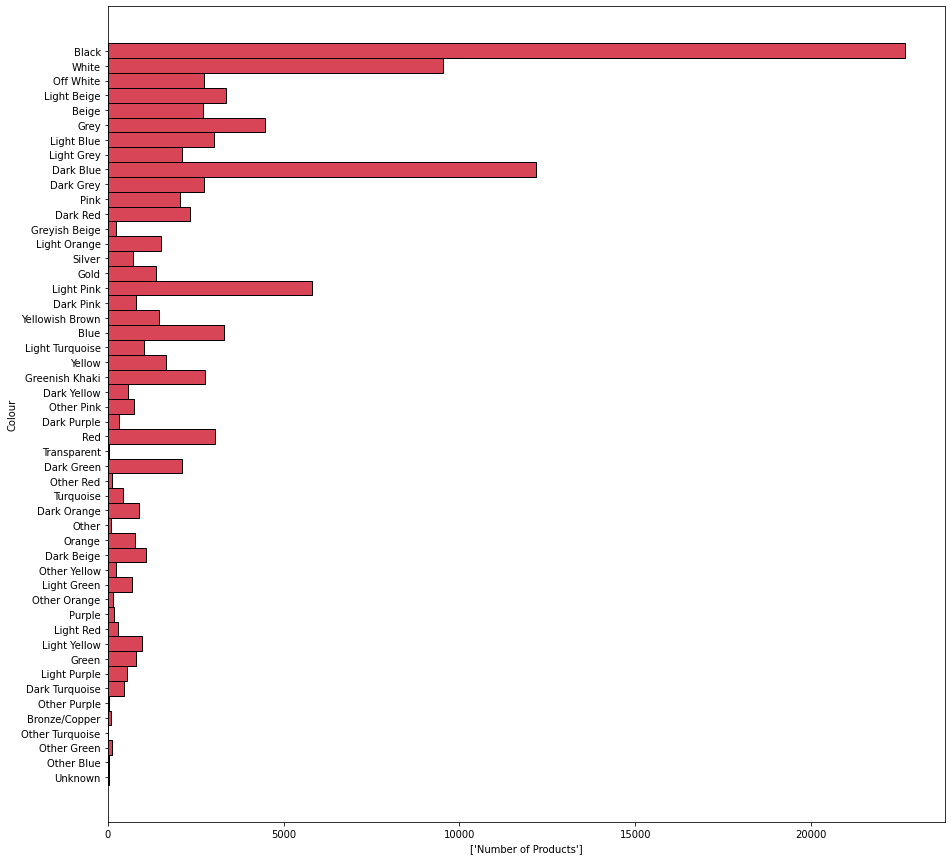

In [46]:
# the production of product colour

fix, col = plt.subplots(figsize=(15, 15))
col = sns.histplot(data=df_a1,y='colour_group_name', color ='#CC071E')
col.set_xlabel(['Number of Products'])
col.set_ylabel('Colour')
plt.show()

In [47]:
#top 10 colours
top5col = df_a1['colour_group_name'].value_counts()[:5].sort_values(ascending=False)
print(top10col)

       Colour  Number of Products
0       Black               22670
1   Dark Blue               12171
2       White                9542
3  Light Pink                5811
4        Grey                4487


In [48]:
top5col = top10col.reset_index()
top5col.rename(columns = {"colour_group_name":"Number of Products","index":"Colour"}, inplace=True)
top5col.head()

,Colour,Colour,Number of Products
0,0,Black,22670
1,1,Dark Blue,12171
2,2,White,9542
3,3,Light Pink,5811
4,4,Grey,4487


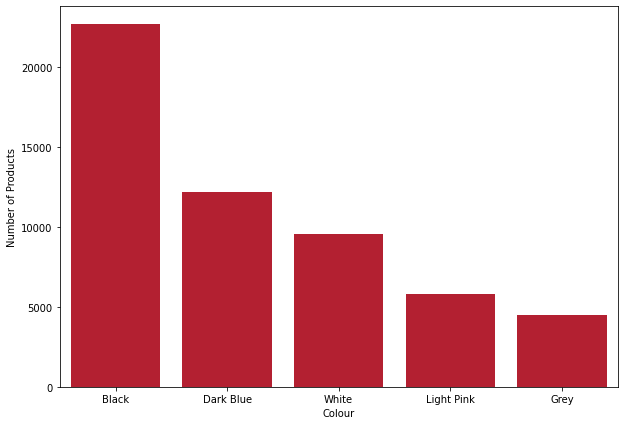

In [49]:
top5 = plt.subplots(figsize=(10, 7))
top5 = sns.barplot(data =top10col, x = 'Colour', y = 'Number of Products',color ='#CC071E')

In [50]:
#top 5 Garments
top_garment = df_a1['garment_group_name'].value_counts()[:5].sort_values(ascending=False)
print(top_garment)

Jersey Fancy         21445
Accessories          11519
Jersey Basic          8126
Knitwear              7490
Under-, Nightwear     7441
Name: garment_group_name, dtype: int64


In [51]:
top_garment_df = pd.DataFrame(top_garment)
top_garment_df.reset_index(inplace=True)
top_garment_df.rename(columns = {"index":"Garment Name","garment_group_name":"Number of Products"},inplace=True)
print(top_garment_df)

        Garment Name  Number of Products
0       Jersey Fancy               21445
1        Accessories               11519
2       Jersey Basic                8126
3           Knitwear                7490
4  Under-, Nightwear                7441


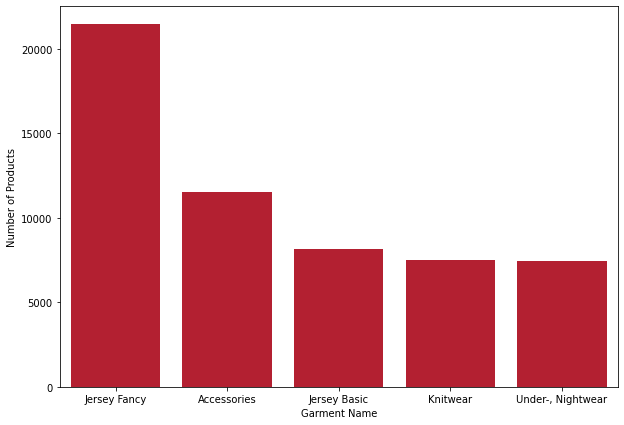

In [52]:
top5garment = plt.subplots(figsize=(10, 7))
top5garment = sns.barplot(data =top_garment_df, x = 'Garment Name', y = 'Number of Products',color ='#CC071E')

In [53]:
#Correlation 
corr = df_a.corr()
corr.style.background_gradient (cmap = "Reds_r")

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
article_id,1.000000,1.000000,-0.029674,0.007993,-0.064497,-0.048664,0.010208,-0.077247,-0.047474,-0.044521,-0.013408
product_code,1.000000,1.000000,-0.029674,0.007993,-0.064497,-0.048664,0.010208,-0.077247,-0.047474,-0.044521,-0.013408
product_type_no,-0.029674,-0.029674,1.000000,-0.001438,0.077929,-0.046910,-0.049135,-0.001921,0.067162,-0.118532,-0.461593
graphical_appearance_no,0.007993,0.007993,-0.001438,1.000000,0.016824,0.026956,0.019440,-0.000316,0.004883,0.011345,0.013072
colour_group_code,-0.064497,-0.064497,0.077929,0.016824,1.000000,0.066724,-0.177083,0.119798,0.035616,0.032955,-0.000316
perceived_colour_value_id,-0.048664,-0.048664,-0.046910,0.026956,0.066724,1.000000,0.027785,0.009986,0.032685,-0.004332,0.020732
perceived_colour_master_id,0.010208,0.010208,-0.049135,0.019440,-0.177083,0.027785,1.000000,-0.017224,-0.035996,-0.002461,-0.022573
department_no,-0.077247,-0.077247,-0.001921,-0.000316,0.119798,0.009986,-0.017224,1.000000,0.453340,0.349181,-0.053457
index_group_no,-0.047474,-0.047474,0.067162,0.004883,0.035616,0.032685,-0.035996,0.453340,1.000000,-0.077389,-0.144313
section_no,-0.044521,-0.044521,-0.118532,0.011345,0.032955,-0.004332,-0.002461,0.349181,-0.077389,1.000000,0.217788


In [54]:
#Data exploration (customers)
df_c.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [55]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [56]:
#customer demography

ages = pd.DataFrame(df_c['age'])

bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+']
ages['age_range'] = pd.cut(ages['age'], bins=bins, labels = labels,include_lowest = True)

print(ages)

          age age_range
0        49.0     40-49
1        25.0     18-29
2        24.0     18-29
3        54.0     50-59
4        52.0     50-59
...       ...       ...
1371975  24.0     18-29
1371976  21.0     18-29
1371977  21.0     18-29
1371978  18.0     18-29
1371979  65.0     60-69

[1371980 rows x 2 columns]


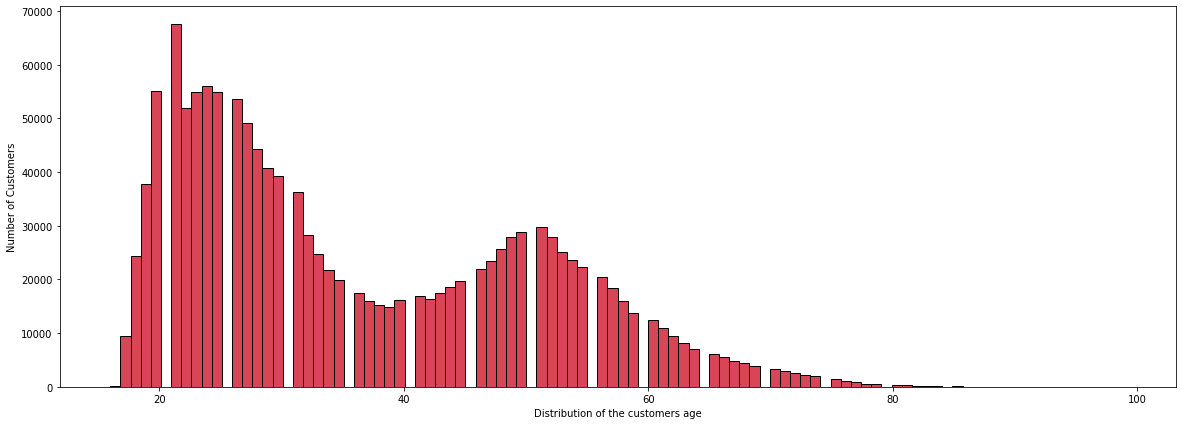

In [57]:
ages_plot = plt.subplots(figsize=(20, 7))
ages_plot = sns.histplot(data = df_c, x='age', bins=100, color='#CC071E')
ages_plot.set_xlabel("Distribution of the customers age")
ages_plot.set_ylabel("Number of Customers")
plt.show() #21 years old is the customer's common age 


In [58]:
#fashion news
df_c['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [59]:
df_c.loc[~df_c['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
df_c['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [60]:
news_sub = df_c.groupby(['fashion_news_frequency'])['customer_id'].count()
print(news_sub)

fashion_news_frequency
Monthly         842
None         893722
Regularly    477416
Name: customer_id, dtype: int64


In [61]:
news_sub_df = pd.DataFrame(news_sub)
news_sub_df = news_sub_df.reset_index()
news_sub_df.rename(columns = {"fashion_news_frequency":"Fashion News Frequency","customer_id":"Number of Customers"},inplace=True)
print(news_sub_df)

  Fashion News Frequency  Number of Customers
0                Monthly                  842
1                   None               893722
2              Regularly               477416


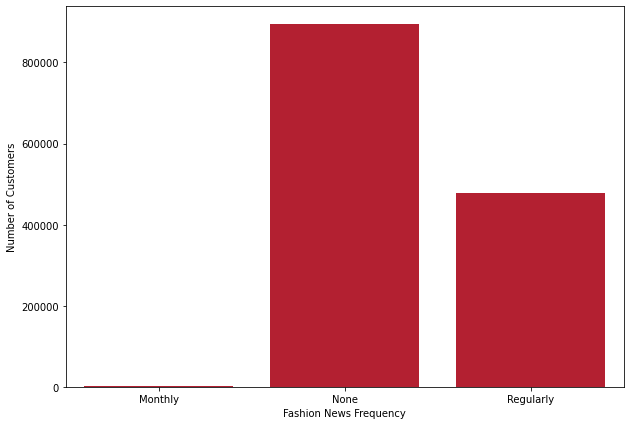

In [62]:
ax_news = plt.subplots(figsize=(10, 7))
ax_news = sns.barplot(data = news_sub_df , x = "Fashion News Frequency", y = "Number of Customers" , color = '#CC071E', order = news_sub_df['Fashion News Frequency'])


In [63]:
#club member 
club_status = df_c['club_member_status'].value_counts().sort_values(ascending=False)
print(club_status)

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64


In [64]:
club_status_df = pd.DataFrame(club_status)
club_status_df = club_status_df.reset_index()
club_status_df.rename(columns = {"index":"Club Member Status","club_member_status":"Number of Customers"},inplace=True)
print(club_status_df)


  Club Member Status  Number of Customers
0             ACTIVE              1272491
1         PRE-CREATE                92960
2          LEFT CLUB                  467


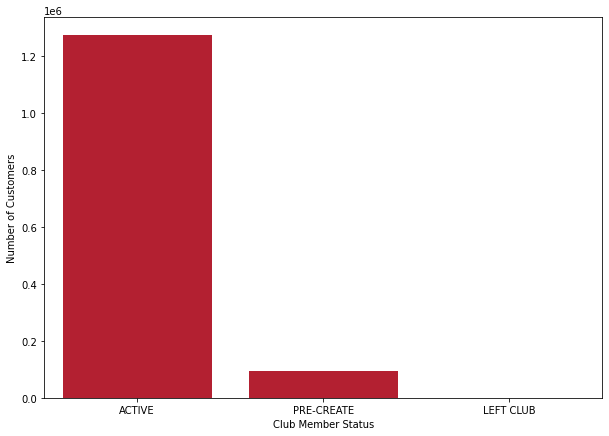

In [65]:
ax_club = plt.subplots(figsize=(10, 7))
ax_club = sns.barplot(data = club_status_df , x = "Club Member Status", y = "Number of Customers" , color = '#CC071E')


In [66]:
#Data exploration (transactions)
df_t.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [67]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [68]:
df_t.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [69]:
df_t['t_dat'] = pd.to_datetime(df_t['t_dat'])

In [70]:
t_per_day = df_t.groupby(['t_dat'],as_index=False)['price'].sum()
print(t_per_day)

         t_dat        price
0   2018-09-20  1415.345847
1   2018-09-21  1419.262305
2   2018-09-22   530.437627
3   2018-09-23  1593.783085
4   2018-09-24  1407.609610
..         ...          ...
729 2020-09-18  1363.858119
730 2020-09-19  1227.471305
731 2020-09-20  1116.071068
732 2020-09-21  1139.598051
733 2020-09-22  1133.418424

[734 rows x 2 columns]


Text(0, 0.5, 'Transactions')

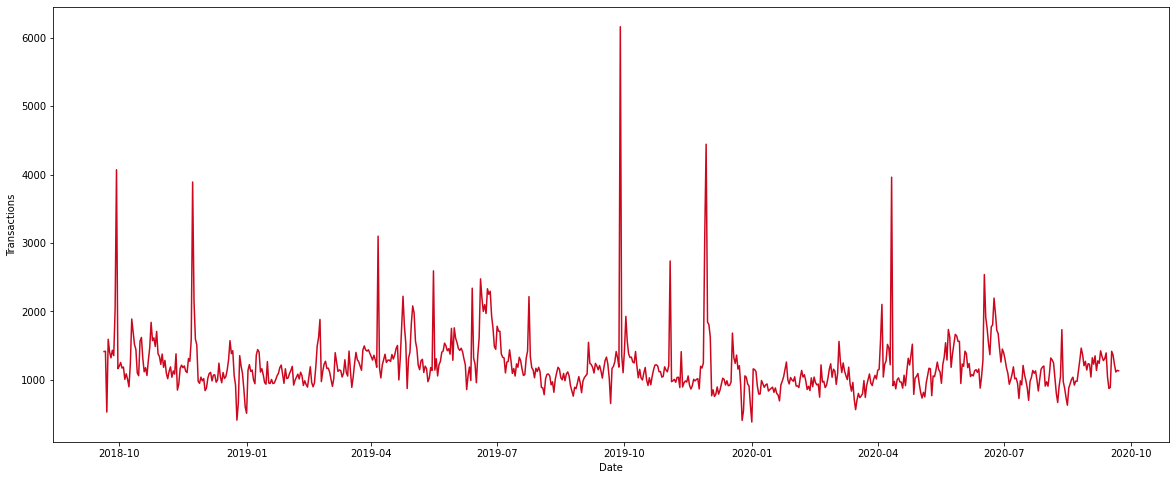

In [71]:
fix, ax = plt.subplots(figsize=(20,8))
ax = sns.lineplot(data= t_per_day , x = 't_dat', y = 'price', color = '#CC071E' )
ax.set_xlabel("Date")
ax.set_ylabel("Transactions")

In [72]:
#sales channels
channel = df_t.groupby(['sales_channel_id'])['sales_channel_id'].count()
print(channel)

sales_channel_id
1     9408462
2    22379862
Name: sales_channel_id, dtype: int64


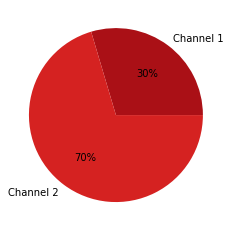

In [73]:
colors = sns.color_palette('Reds_r')
labels = ['Channel 1','Channel 2']

plt.pie(channel, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [74]:
corr_transactions = df_t.corr()
corr_transactions.style.background_gradient (cmap = "Reds_r")

,article_id,price,sales_channel_id
article_id,1.000000,0.141169,0.085231
price,0.141169,1.000000,0.165802
sales_channel_id,0.085231,0.165802,1.000000
